In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
data=pd.read_csv('data.csv')

In [52]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [53]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [55]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [56]:
data=data.drop('country',axis=1)

In [57]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.318093,-0.200402,-0.127211,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.318093,1.000000,-0.114408,0.737381,0.516784,-0.107294,0.316313,-0.320011,0.418725
health,-0.200402,-0.114408,1.000000,0.095717,0.129579,-0.255376,0.210692,-0.196674,0.345966
imports,-0.127211,0.737381,0.095717,1.000000,0.122406,-0.246994,0.054391,-0.159048,0.115498
income,-0.524315,0.516784,0.129579,0.122406,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.107294,-0.255376,-0.246994,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.316313,0.210692,0.054391,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.320011,-0.196674,-0.159048,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.418725,0.345966,0.115498,0.895571,-0.221631,0.600089,-0.454910,1.000000


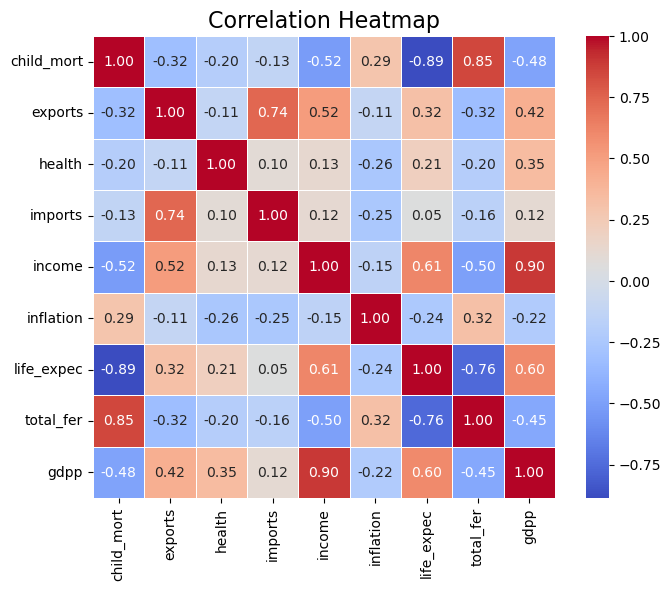

In [58]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    data.corr(),
    annot=True,            
    cmap='coolwarm',       
    fmt='.2f',             
    linewidths=0.5,        
    square=True            
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

In [10]:
#data['export_value']=(data['exports']/100)*data['gdpp']
#data['import_value']=(data['imports']/100)*data['gdpp']
#data['health_value']=(data['health']/100)*data['gdpp']

In [11]:
#data=data.drop(columns=['exports','imports','health'])

In [59]:
data['income_class'] = (data['income'] >= data['income'].median()).astype(int)
data = data.drop(columns=['income'])

In [60]:
def train_test_split(X, Y, test_size=0.2, seed=42):
    np.random.seed(seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_len = int(len(indices) * test_size)

    test_idx = indices[:test_len]
    train_idx = indices[test_len:]

    return X[train_idx], X[test_idx], Y[train_idx], Y[test_idx]

def standardize(X_train, X_test):
    mean = X_train.mean(axis=0)
    std = X_train.std(axis=0) + 1e-8

    X_train_std = (X_train - mean) / std
    X_test_std = (X_test - mean) / std

    return X_train_std, X_test_std

In [61]:
data['income_class']

0      0
1      0
2      1
3      0
4      1
      ..
162    0
163    1
164    0
165    0
166    0
Name: income_class, Length: 167, dtype: int32

In [16]:
#data=data.drop("gdpp",axis=1)

In [63]:
Y = data["income_class"].values
X = data.drop("income_class", axis=1).values

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


X_train, X_test = standardize(X_train, X_test)

In [65]:
print(X_train.shape)
print(Y_train)

(134, 8)
[1 1 1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1
 0 1 0 0 1 1 0 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0
 0 1 1 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 0]


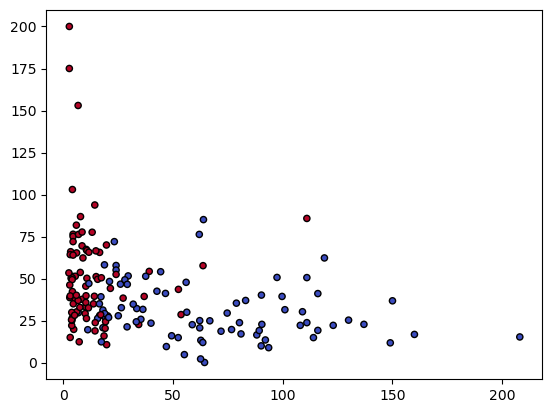

In [66]:
plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y,cmap='coolwarm',edgecolor='k',s=20)

In [67]:
cov_matrix = np.cov(X_train, rowvar=False)

In [68]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

In [69]:
idx = np.argsort(eigenvalues)[::-1]

eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

In [70]:
W = eigenvectors[:, :2]   # projection matrix

In [71]:
X_train_pca = X_train @ W
X_test_pca = X_test @ W

In [72]:
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
print("PC1 variance:", explained_variance_ratio[0])
print("PC2 variance:", explained_variance_ratio[1])
print("Total (PC1 + PC2):", explained_variance_ratio[:2].sum())

PC1 variance: 0.4361924339220593
PC2 variance: 0.19590565523466447
Total (PC1 + PC2): 0.6320980891567238


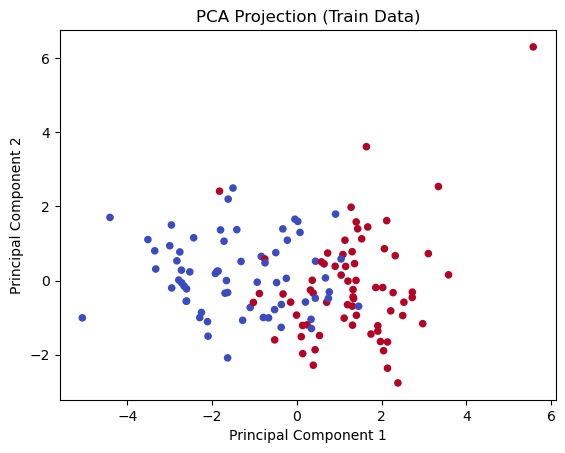

In [73]:
plt.figure()
plt.scatter(
    X_train_pca[:, 0],
    X_train_pca[:, 1],
    c=Y_train,
    cmap='coolwarm',
    s=20
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (Train Data)")
plt.show()

In [74]:
def euclidean_distance(x1,x2):
    distance=np.sqrt(np.sum((x1-x2)**2))
    return distance

In [75]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)
        
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        k_indices = np.argsort(distances)[:self.k]

        k_nearest_labels = [self.Y_train[i] for i in k_indices]

        most_common = max(set(k_nearest_labels), key=k_nearest_labels.count)
        return most_common

In [90]:
clf=KNN(k=3)
clf.fit(X_train,Y_train)
predictions=clf.predict(X_test)

acc=np.sum(predictions==Y_test)/len(Y_test)
print(acc)

0.9090909090909091


In [91]:
TP = np.sum((predictions == 1) & (Y_test == 1))
TN = np.sum((predictions == 0) & (Y_test == 0))
FP = np.sum((predictions == 1) & (Y_test == 0))
FN = np.sum((predictions == 0) & (Y_test == 1))

print(TP, TN, FP, FN)


14 16 2 1


In [92]:
precision =TP / (TP + FP)
recall= TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

In [93]:
print("precision =", precision )
print("recall =", recall) 
print("f1=",f1)

precision = 0.875
recall = 0.9333333333333333
f1= 0.9032258064516129


k=3
  Accuracy : 0.909
  Precision: 0.875
  Recall   : 0.933
  F1-score : 0.903
k=5
  Accuracy : 0.909
  Precision: 0.875
  Recall   : 0.933
  F1-score : 0.903
k=7
  Accuracy : 0.848
  Precision: 0.778
  Recall   : 0.933
  F1-score : 0.848
k=9
  Accuracy : 0.879
  Precision: 0.824
  Recall   : 0.933
  F1-score : 0.875
